### Stock Market Prediction And Forecasting Using Stacked LSTM

In [122]:
### Keras and Tensorflow >2.0

In [123]:
### Data Collection
import pandas_datareader as pdr
key=""

In [124]:
import pandas as pd

In [125]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [126]:
df=yf.download('AAPL', start='2012-01-01', end=datetime.now())

[*********************100%***********************]  1 of 1 completed


In [127]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03 00:00:00-05:00,14.621429,14.732143,14.607143,14.686786,12.519279,302220800
2012-01-04 00:00:00-05:00,14.642857,14.810000,14.617143,14.765714,12.586558,260022000
2012-01-05 00:00:00-05:00,14.819643,14.948214,14.738214,14.929643,12.726294,271269600
2012-01-06 00:00:00-05:00,14.991786,15.098214,14.972143,15.085714,12.859333,318292800
2012-01-09 00:00:00-05:00,15.196429,15.276786,15.048214,15.061786,12.838935,394024400


In [128]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-30 00:00:00-05:00,144.960007,145.550003,142.850006,143.000000,143.000000,64015300
2023-01-31 00:00:00-05:00,142.699997,144.339996,142.279999,144.289993,144.289993,65874500
2023-02-01 00:00:00-05:00,143.970001,146.610001,141.320007,145.429993,145.429993,77663600
2023-02-02 00:00:00-05:00,148.899994,151.179993,148.169998,150.820007,150.820007,118339000
2023-02-03 00:00:00-05:00,148.029999,157.380005,147.830002,154.500000,154.500000,154279900


In [129]:
df1=df['Close']

In [130]:
df1

Date
2012-01-03 00:00:00-05:00     14.686786
2012-01-04 00:00:00-05:00     14.765714
2012-01-05 00:00:00-05:00     14.929643
2012-01-06 00:00:00-05:00     15.085714
2012-01-09 00:00:00-05:00     15.061786
                                ...    
2023-01-30 00:00:00-05:00    143.000000
2023-01-31 00:00:00-05:00    144.289993
2023-02-01 00:00:00-05:00    145.429993
2023-02-02 00:00:00-05:00    150.820007
2023-02-03 00:00:00-05:00    154.500000
Name: Close, Length: 2791, dtype: float64

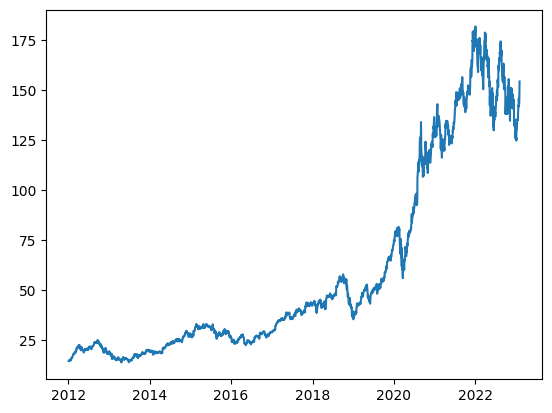

In [131]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [132]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [133]:
import numpy as np

In [134]:
df1

Date
2012-01-03 00:00:00-05:00     14.686786
2012-01-04 00:00:00-05:00     14.765714
2012-01-05 00:00:00-05:00     14.929643
2012-01-06 00:00:00-05:00     15.085714
2012-01-09 00:00:00-05:00     15.061786
                                ...    
2023-01-30 00:00:00-05:00    143.000000
2023-01-31 00:00:00-05:00    144.289993
2023-02-01 00:00:00-05:00    145.429993
2023-02-02 00:00:00-05:00    150.820007
2023-02-03 00:00:00-05:00    154.500000
Name: Close, Length: 2791, dtype: float64

In [135]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [136]:
print(df1)

[[0.00439887]
 [0.00486851]
 [0.00584391]
 ...
 [0.78234286]
 [0.81441435]
 [0.83631092]]


In [137]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.9)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [138]:
training_size,test_size

(2511, 280)

In [139]:
train_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.92705098],
       [0.94632955],
       [0.96209746]])

In [140]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [141]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [142]:
print(X_train.shape), print(y_train.shape)

(2450, 60)
(2450,)


(None, None)

In [143]:
print(X_test.shape), print(ytest.shape)

(219, 60)
(219,)


(None, None)

In [144]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [145]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [146]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [147]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [148]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_10 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [149]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)

Epoch 1/10


ValueError: in user code:

    File "d:\Stock_Research\env\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "d:\Stock_Research\env\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "d:\Stock_Research\env\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "d:\Stock_Research\env\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "d:\Stock_Research\env\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "d:\Stock_Research\env\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_3" is incompatible with the layer: expected shape=(None, 100, 1), found shape=(None, 60, 1)


In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.11.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

15/15 [==============================] - 0s 29ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43.1359421735812

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

141.0606384719802

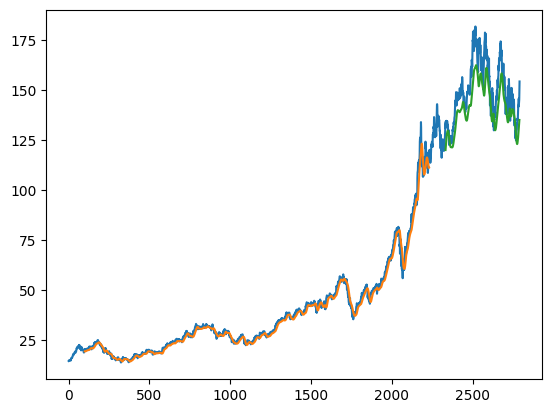

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

559

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8323837909822064,
 0.8411305445456274,
 0.8236370374187854,
 0.813700268503626,
 0.8361918945831797,
 0.8505912891616211,
 0.8316697999296337,
 0.8258386611514702,
 0.812093697842986,
 0.8141168238125278,
 0.8200074315809551,
 0.8085831207780352,
 0.764789883970666,
 0.7393231741155909,
 0.7646113862075229,
 0.7863295522442401,
 0.7881145298756717,
 0.782342860087772,
 0.7505689871553678,
 0.7525325533422941,
 0.7439642975420162,
 0.7401561939410428,
 0.7678245275288028,
 0.7403942514868014,
 0.7643734194541159,
 0.7723466221823488,
 0.7730011442446576,
 0.7702045582322793,
 0.793291237383878,
 0.8062625590648225,
 0.8234585396556422,
 0.8056675967851291,
 0.7785943162694141,
 0.8436891638045987,
 0.829408707206685,
 0.8134027419676035,
 0.7799628293842955,
 0.7433693352623229,
 0.7403942514868014,
 0.7436073020157299,
 0.7470584100904168,
 0.7195091052755362,
 0.7909111158880499,
 0.8077501009525833,
 0.7993008739251846,
 0.8097731361297734,
 0.8023354266909699,
 0.8138192972765053

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.73397124]
101
1 day input [0.84113054 0.82363704 0.81370027 0.83619189 0.85059129 0.8316698
 0.82583866 0.8120937  0.81411682 0.82000743 0.80858312 0.76478988
 0.73932317 0.76461139 0.78632955 0.78811453 0.78234286 0.75056899
 0.75253255 0.7439643  0.74015619 0.76782453 0.74039425 0.76437342
 0.77234662 0.77300114 0.77020456 0.79329124 0.80626256 0.82345854
 0.8056676  0.77859432 0.84368916 0.82940871 0.81340274 0.77996283
 0.74336934 0.74039425 0.7436073  0.74705841 0.71950911 0.79091112
 0.8077501  0.79930087 0.80977314 0.80233543 0.8138193  0.81721085
 0.7976943  0.81060616 0.81590189 0.79828936 0.77514321 0.75699518
 0.79781333 0.79947937 0.79650429 0.78948313 0.7673485  0.75562667
 0.7658014  0.76288588 0.77674978 0.78258092 0.76913357 0.72920791
 0.71736704 0.70463369 0.70421722 0.72296021 0.70380067 0.70159913
 0.69071032 0.66696916 0.68821126 0.69011526 0.66119749 0.66887321
 0.66089996 0.68827073 0.69142431 0.69487542 0.71129794 0.71082191
 0.71885458 0.72587583 0.72153223 

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

2791

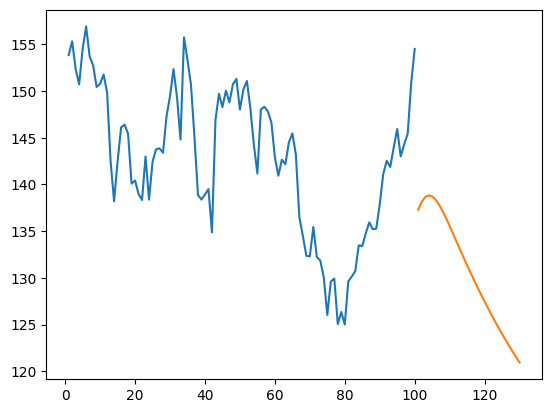

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

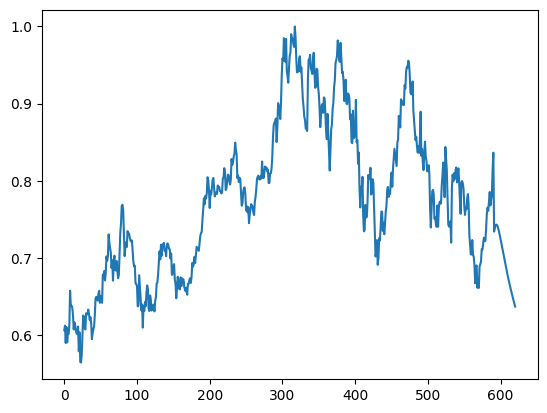

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

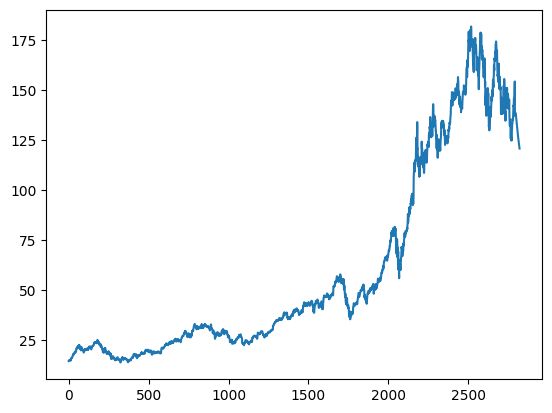

In [ ]:
plt.plot(df3)